In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
from pandasql import sqldf
import numpy as np
import fonctions as fc
import importlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time

from scipy import stats 
from scipy.stats import f_oneway, kruskal
from scipy.stats import shapiro, kstest, yeojohnson, boxcox

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, LatentDirichletAllocation, NMF
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, adjusted_rand_score

from glob import glob
import keras.preprocessing.image

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import Constant
import gensim
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel, TFAutoModel, AutoTokenizer

import re
import string

import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, words, wordnet, brown
from nltk.tag import pos_tag

from wordcloud import WordCloud
from PIL import Image

D:\Programme\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]

In [2]:
importlib.reload(fc)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<module 'fonctions' from 'C:\\Users\\Anais\\Documents\\OpenClassRooms\\Projet6+Classifiez+automatiquement+des+biens+de+consommation\\Dataset+projet+prétraitement+textes+images\\Flipkart\\fonctions.py'>

In [3]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Enoncé

Vous êtes Data Scientist au sein de l’entreprise "Place de marché”, qui souhaite lancer une marketplace e-commerce.

Sur cette place de marché anglophone, des vendeurs proposent des articles à des acheteurs en postant une photo et une description. 

Pour l'instant, l'attribution de la catégorie d'un article est effectuée manuellement par les vendeurs, et est donc peu fiable. De plus, le volume des articles est pour l’instant très pe


 

Pour rendre l’expérience utilisateur des vendeurs (faciliter la mise en ligne de nouveaux articles) et des acheteurs (faciliter la recherche de produits) la plus fluide possible, et dans l'optique d'un passage à l'échelle,  il devient nécessaire d'automatiser cette tâche d‘attribution de la catrie.

 

Linda, Lead Data Scientist, vous demande donc d'étudier la faisabilité d'un moteur de classification des articles en différentes catégories, à partir du texte (en anglais) et de l’image comme dans l’illustration

# Missions

Ta mission sera de réaliser une étude de faisabilité d'un moteur de classification automatique d’articles, en utilisant leur image et leur description ci-dessous.


# I- Visualisation des données

In [4]:
df = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [5]:
print('Ce jeu de donnée comporte ' + str(df.shape[0]) + ' lignes et ' + str(df.shape[1]) + ' colonnes')

Ce jeu de donnée comporte 1050 lignes et 15 colonnes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64


<Axes: >

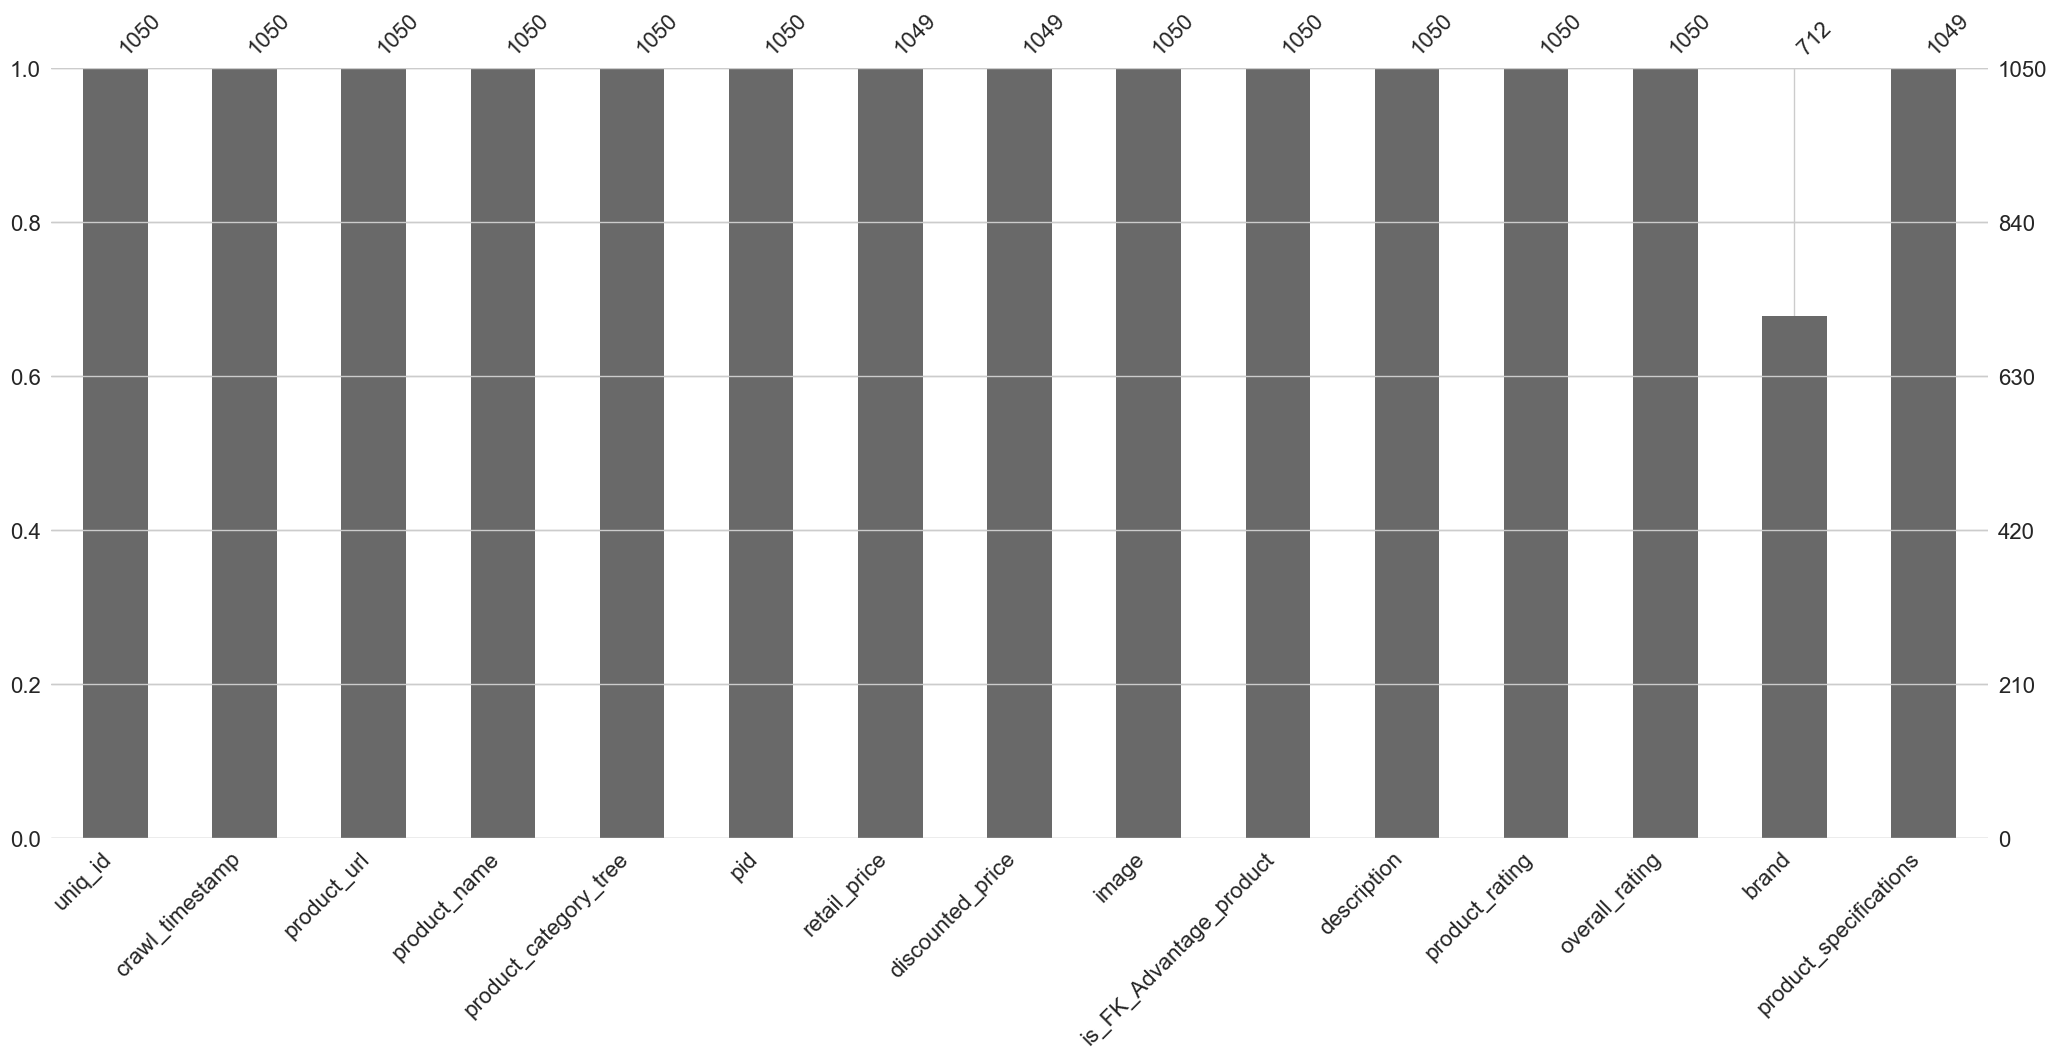

In [7]:
# Existe-t-il des valeurs manquantes dans ce jeu de données ?
print(df.isna().sum())
msno.bar(df)

In [8]:
df.describe()

retail_price  discounted_price
count    1049.000000       1049.000000
mean     2186.197331       1584.527169
std      7639.229411       7475.099680
min        35.000000         35.000000
25%       555.000000        340.000000
50%       999.000000        600.000000
75%      1999.000000       1199.000000
max    201000.000000     201000.000000

# II- Nettoyage des données

On supprime les lignes duppliquées s'il y en a

In [9]:
print("Le nombre de doublons dans df est de : ", df[df.duplicated()].shape[0])
df = df.drop_duplicates(keep='first')

Le nombre de doublons dans df est de :  0


### _2.1) Nettoyage de la variable 'product_name'_

On vérifie la similarité entre les colonnes 'product_name' et 'description' pour éviter les redondances

In [10]:
#Extraction des mots uniques pour chaque produit  
df['product_name_words'] = df['product_name'].apply(fc.extract_unique_words)
df['description_words'] = df['description'].apply(fc.extract_unique_words)

#Retrouve-t-on les mots de 'product_name' dans 'description' ?
df['words_match'] = df.apply(lambda x: x['product_name_words'].issubset(x['description_words']), axis=1)
df['words_match'].value_counts()

words_match
True    1050
Name: count, dtype: int64

Tous les mots compris dans la colonne 'product_name' sont aussi présents à chaque fois dans la colonne 'description'. On en déduit donc qu'il est inutile de garder cette colonne car elle sera redondante. On sélectionne donc les colonnes pertinentes pour la suite du projet :

In [11]:
df = df[['product_category_tree', 'description']]
print(df.shape)

(1050, 2)


### _2.2) Création de la variable 'main_category'_
On cherche à extraire de la variable 'product_category_tree' la catégorie principale de chaque produit afin d'en faire une nouvelle variable qu'on va nommer 'main_category'

In [12]:
# Elimination des crochets et des guillemets de la variable 'product_category_tree'
df["product_category_tree"] = df["product_category_tree"].str.replace("[", "")
df["product_category_tree"] = df["product_category_tree"].str.replace("]", "")
df["product_category_tree"] = df["product_category_tree"].str.replace('"', '')

La nouvelle variable 'main_category' représente la catégorie principale extraite de chaque produit à partir de 'product_category_tree'

main_category
home furnishing                 150
baby care                       150
watches                         150
home decor and festive needs    150
kitchen and dining              150
beauty and personal care        150
computers                       150
Name: count, dtype: int64


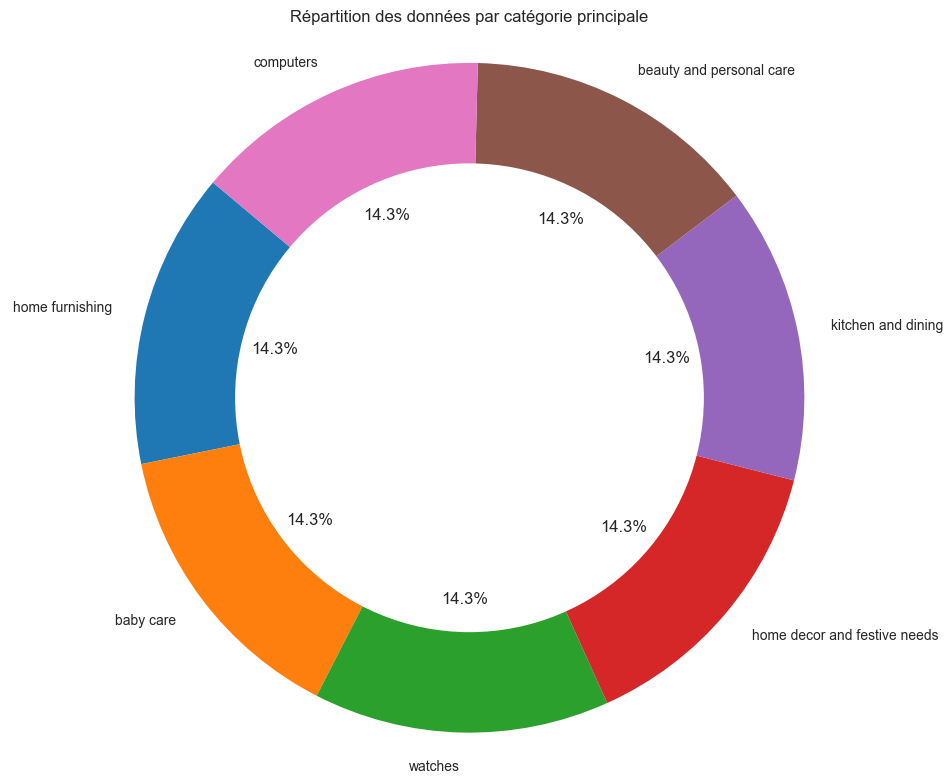

In [13]:
# Création de la variable 'main_category'
df["main_category"] = df["product_category_tree"].str.split('>>').str[0]

# Nettoyage (lower // remplacer '&' par 'and' // supprimer les espaces)
df["main_category"] = df["main_category"].str.lower()
df["main_category"] = df["main_category"].str.replace("&", 'and')
df['main_category'] = df['main_category'].str.strip()

#Donut Chart
nb_category = df['main_category'].value_counts()
print(nb_category)
labels = nb_category.index

plt.figure(figsize=(10, 8))
plt.pie(nb_category, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Répartition des données par catégorie principale')
plt.tight_layout()
plt.show()

On a donc 7 catégories principales de produits, avec chacune 150 produits :
- home furnishing
- baby care
- watches
- home decord and festive needs
- kitchen and dining
- beauty and personal Care
- computer

### _2.3) Pre-nettoyage de la variable 'description'_

Nous allons appliquer plusieurs étapes de nettoyage à notre colonne description :
- **Tokenization** : La tokenization est le processus de division d'un texte en unités plus petites appelées tokens. Ces tokens peuvent être des mots individuels ou des phrases. Par exemple, dans la phrase "Le chat dort", la tokenization séparera les mots en tokens individuels, soit ["Le", "chat", "dort"].

- **Stop Words** : Les stop words sont des mots très courants et généralement peu informatifs qui sont souvent éliminés lors du traitement du langage naturel pour améliorer les performances des algorithmes et réduire le bruit. Ces mots incluent des mots comme "le", "la", "et", "de", etc.

- **Lemmatisation** : La lemmatisation est le processus de normalisation des mots en les ramenant à leur forme de base ou de racine, appelée lemmes. Par exemple, les mots "mangé", "mangeait" et "mangeront" seraient tous ramenés à leur lemme commun "manger".


On effectue une jointure de la description de l'ensemble des produits 

In [14]:
raw_corpus = " ".join(df.description.values)
raw_corpus[:1300]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [15]:
print(f'Le corpus description des produits comprend {len(raw_corpus)} tokens.')

Le corpus description des produits comprend 498561 tokens.


On effectue les étapes de nettoyage citées précédemment

In [16]:
# Nettoyage de raw_corpus
corpus = fc.process_description(raw_corpus)
fc.display_tokens_info(corpus)

nb tokens : 61786, nb tokens uniques : 5547
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'r', '899', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', '100', 'high', 'quality', 'polyester', 'fabric', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant']


In [17]:
# Tokens présent une seule fois
tmp_corpus = pd.Series(corpus).value_counts()
liste_unique_words = tmp_corpus[tmp_corpus == 1]
print(liste_unique_words[:30])
print(f'Parmi les 5547 tokens uniques du corpus description, {len(liste_unique_words)} apparaissent une seule fois.')

raw             1
smudge          1
ke              1
sugary          1
calorie         1
tipped          1
recorder        1
wkhs0164s       1
161207          1
drinking        1
humor           1
thigh           1
avasthi         1
cokb504black    1
5692            1
rani            1
88ebtsh0565     1
nature          1
flavored        1
stor            1
sub             1
applying        1
thriller        1
luxarious       1
everyday        1
gurantee        1
ployester       1
2950            1
mitered         1
filink          1
Name: count, dtype: int64
Parmi les 5547 tokens uniques du corpus description, 1788 apparaissent une seule fois.


On vient de faire le nettoyage sur la description de l'ensemble des produits. On va maintenant créé une nouvelle variable 'pre_clen_description_ qui va permettre d'effectuer le nettoyage sur chaque produit individuellement.

In [18]:
df["pre_clean_description"] = df['description'].apply(fc.pre_cleaning)
df.head()

product_category_tree  \
0  Home Furnishing >> Curtains & Accessories >> C...   
1  Baby Care >> Baby Bath & Skin >> Baby Bath Tow...   
2  Baby Care >> Baby Bath & Skin >> Baby Bath Tow...   
3  Home Furnishing >> Bed Linen >> Bedsheets >> S...   
4  Home Furnishing >> Bed Linen >> Bedsheets >> J...   

                                         description    main_category  \
0  Key Features of Elegance Polyester Multicolor ...  home furnishing   
1  Specifications of Sathiyas Cotton Bath Towel (...        baby care   
2  Key Features of Eurospa Cotton Terry Face Towe...        baby care   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  home furnishing   
4  Key Features of Jaipur Print Cotton Floral Kin...  home furnishing   

                               pre_clean_description  
0  key feature elegance polyester multicolor abst...  
1  specification sathiyas cotton bath towel 3 bat...  
2  key feature eurospa cotton terry face towel se...  
3  key feature santosh royal fashion cotton print...  
4  key feature jaipur print cotton floral king si...

In [19]:
print("Description d'un produit avant le pré-nettoyage")
print("-------------------------------------------------------------")
print(df["description"][0])
print()
print("Description du même produit après un pré-nettoyage")
print("-------------------------------------------------------------")
print(df["pre_clean_description"][0])

Description d'un produit avant le pré-nettoyage
-------------------------------------------------------------
Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty gi

Quelques améliorations peuvent être apportées au processus de nettoyage de la variable 'description' :

- **Suppression des tokens de moins de 3 caractères :** Trois caractères est un seuil généralement utilisé.
  
- **Suppression des tokens présent qu'une seule fois :** Cela peut être considéré comme du bruit.

- **Élimination des URL, balises HTML, caractères non ASCII  :** Par précaution.



### _2.4) Nettoyage finale de la variable 'description'_

In [20]:
# Lower()
df['clean_description'] = df['description'].apply(lambda x : x.lower())

# Elimination des adresses URL // balises HTML // caractères non-ASCII
df['clean_description'] = df['clean_description'].apply(lambda x : fc.clean_text(x))

#Tokenization 
tokenizer = RegexpTokenizer(r'\w+')
df['clean_description'] = df['clean_description'].apply(tokenizer.tokenize)

# Élimination des stopwords anglais
stop_words = set(stopwords.words('english'))
df['clean_description'] = df['clean_description'].apply(lambda x: [w for w in x if w not in stop_words])

# Elimination des mots non anglais
english_words = set(nltk.corpus.words.words())
df['clean_description'] = df['clean_description'].apply(lambda x: [w for w in x if w in english_words])

# Suppression des tokens de moins de 3 caractères
df['clean_description'] = df['clean_description'].apply(lambda x: [w for w in x if len(w) >= 3])

# Suppression des mots n'apparaissant qu'une fois
df['clean_description'] = df['clean_description'].apply(lambda x: [w for w in x if w not in liste_unique_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['clean_description'] = df['clean_description'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

# Jointure des tokens 
df['clean_description'] = df['clean_description'].apply(lambda x: " ".join(x))

df.head()

product_category_tree  \
0  Home Furnishing >> Curtains & Accessories >> C...   
1  Baby Care >> Baby Bath & Skin >> Baby Bath Tow...   
2  Baby Care >> Baby Bath & Skin >> Baby Bath Tow...   
3  Home Furnishing >> Bed Linen >> Bedsheets >> S...   
4  Home Furnishing >> Bed Linen >> Bedsheets >> J...   

                                         description    main_category  \
0  Key Features of Elegance Polyester Multicolor ...  home furnishing   
1  Specifications of Sathiyas Cotton Bath Towel (...        baby care   
2  Key Features of Eurospa Cotton Terry Face Towe...        baby care   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  home furnishing   
4  Key Features of Jaipur Print Cotton Floral Kin...  home furnishing   

                               pre_clean_description  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel 3 bat...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                   clean_description  
0  key elegance polyester multicolor abstract eye...  
1  cotton bath towel bath towel red yellow blue b...  
2  key cotton terry face towel set size small hei...  
3  key royal fashion cotton printed king sized do...  
4  key print cotton floral king sized double cott...

Nous allons aussi éliminer les tokens communs aux 7 catégories de la variable 'main_category'

In [21]:
home_furnishing = df[df['main_category'].str.contains("home furnishing")]
baby_care = df[df["main_category"].str.contains("baby care")]
watches = df[df["main_category"].str.contains("watches")]
home_decor_and_festive_needs = df[df["main_category"].str.contains("home decor and festive needs")]
kitchen_and_dining = df[df["main_category"].str.contains("kitchen and dining")]
beauty_and_personal_care = df[df["main_category"].str.contains("beauty and personal care")]
computers = df[df["main_category"].str.contains("computers")]

In [22]:
# Création des 7 corpus 
home_furnishing_corpus = " ".join(home_furnishing.clean_description.values)
baby_care_corpus = " ".join(baby_care.clean_description.values)
watches_corpus = " ".join(watches.clean_description.values)
home_decor_and_festive_needs_corpus = " ".join(home_decor_and_festive_needs.clean_description.values)
kitchen_and_dining_corpus = " ".join(kitchen_and_dining.clean_description.values)
beauty_and_personal_care_corpus = " ".join(beauty_and_personal_care.clean_description.values)
computers_corpus = " ".join(computers.clean_description.values)

In [23]:
tokeniser= RegexpTokenizer(r'\w+')
tokens_home_furnishing = tokeniser.tokenize(home_furnishing_corpus)
tokens_home_decor_and_festive_needs = tokenizer.tokenize(home_decor_and_festive_needs_corpus)
tokens_baby_care = tokeniser.tokenize(baby_care_corpus)
tokens_watches = tokeniser.tokenize(watches_corpus)
tokens_kitchen_and_dining = tokeniser.tokenize(kitchen_and_dining_corpus)
tokens_beauty_and_personal_care = tokeniser.tokenize(beauty_and_personal_care_corpus)
tokens_computers = tokeniser.tokenize(computers_corpus)

In [24]:
tokens_communs = list(set.intersection(*map(set, [tokens_baby_care, tokens_beauty_and_personal_care, tokens_computers, tokens_home_decor_and_festive_needs, tokens_home_furnishing, tokens_kitchen_and_dining, tokens_watches])))
print(tokens_communs)

['made', 'ideal', 'width', 'day', 'genuine', 'brand', 'free', 'world', 'package', 'like', 'design', 'key', 'way', 'weight', 'size', 'long', 'great', 'material', 'price', 'style', 'well', 'number', 'buy', 'black', 'add', 'life', 'vary', 'blue', 'body', 'cash', 'water', 'light', 'high', 'content', 'suitable', 'type', 'green', 'touch', 'color', 'back', 'yes', 'quality', 'general', 'cover', 'replacement', 'may', 'shipping', 'box', 'one', 'red', 'come', 'get', 'delivery', 'pink', 'product', 'white', 'pack', 'designed', 'look', 'height', 'new']


In [25]:
print(f'{len(tokens_communs)} mots sont communs aux 7 catégories. Leur présence pourrait entraîner une confusion lors de la classification des produits. Par conséquent, nous allons éliminer ces stopwords spécifiques au projet dans une nouvelle variable final_description.')

61 mots sont communs aux 7 catégories. Leur présence pourrait entraîner une confusion lors de la classification des produits. Par conséquent, nous allons éliminer ces stopwords spécifiques au projet dans une nouvelle variable final_description.


In [26]:
# Lower()
df['final_description'] = df['description'].apply(lambda x : x.lower())

# Elimination des adresses URL // balises HTML // caractères non-ASCII
df['final_description'] = df['final_description'].apply(lambda x : fc.clean_text(x))

#Tokenization 
tokenizer = RegexpTokenizer(r'\w+')
df['final_description'] = df['final_description'].apply(tokenizer.tokenize)

# Élimination des stopwords
stop_words = set(stopwords.words('english'))
df['final_description'] = df['final_description'].apply(lambda x: [w for w in x if w not in stop_words])

# Elimination des stopwords (communs aux 7 catégories)
df["final_description"] = df["final_description"].apply(lambda x : [w for w in x if w not in tokens_communs])

# Elimination des mots non anglais
english_words = set(nltk.corpus.words.words())
df['final_description'] = df['final_description'].apply(lambda x: [w for w in x if w in english_words])

# Suppression des mots n'apparaissant qu'une fois
df['final_description'] = df['final_description'].apply(lambda x: [w for w in x if w not in liste_unique_words])

# Elimination des mots possédant un mélange de chiffres et de lettres
df["final_description"] = df["final_description"].apply(lambda x : [w for w in x if w.isalpha()])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['final_description'] = df['final_description'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

# Jointure des tokens 
df['final_description'] = df['final_description'].apply(lambda x: " ".join(x))

df.head()

product_category_tree  \
0  Home Furnishing >> Curtains & Accessories >> C...   
1  Baby Care >> Baby Bath & Skin >> Baby Bath Tow...   
2  Baby Care >> Baby Bath & Skin >> Baby Bath Tow...   
3  Home Furnishing >> Bed Linen >> Bedsheets >> S...   
4  Home Furnishing >> Bed Linen >> Bedsheets >> J...   

                                         description    main_category  \
0  Key Features of Elegance Polyester Multicolor ...  home furnishing   
1  Specifications of Sathiyas Cotton Bath Towel (...        baby care   
2  Key Features of Eurospa Cotton Terry Face Towe...        baby care   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  home furnishing   
4  Key Features of Jaipur Print Cotton Floral Kin...  home furnishing   

                               pre_clean_description  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel 3 bat...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                   clean_description  \
0  key elegance polyester multicolor abstract eye...   
1  cotton bath towel bath towel red yellow blue b...   
2  key cotton terry face towel set size small hei...   
3  key royal fashion cotton printed king sized do...   
4  key print cotton floral king sized double cott...   

                                   final_description  
0  elegance polyester multicolor abstract eyelet ...  
1  cotton bath towel bath towel yellow bath towel...  
2  cotton terry face towel set small inch cotton ...  
3  royal fashion cotton printed king sized double...  
4  print cotton floral king sized double cotton p...

In [27]:
print("Description d'un produit après le pré-nettoyage")
print(df['pre_clean_description'][0])
print()
print("Description du même produit après nettoyage final")
print(df['final_description'][0])

Description d'un produit après le pré-nettoyage
key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 price r 899 curtain enhances look interior curtain made 100 high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight specification elegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 general brand elegance designed door type eyelet model name abstract polyester door curtain set 2 mo

# _2.5) Wordcloud_

Le WordCloud est une représentation visuelle de données textuelles où les mots sont affichés de manière graphique en fonction de leur fréquence d'apparition dans un corpus de texte. Les mots les plus fréquents apparaissent généralement en plus grand, tandis que les mots moins fréquents sont affichés en plus petit.

In [28]:
df_wordcloud = df.copy()

home_furnishing = df_wordcloud[df_wordcloud['main_category'].str.contains("home furnishing")]
baby_care = df_wordcloud[df_wordcloud["main_category"].str.contains("baby care")]
watches = df_wordcloud[df_wordcloud["main_category"].str.contains("watches")]
home_decor_and_festive_needs = df_wordcloud[df_wordcloud["main_category"].str.contains("home decor and festive needs")]
kitchen_and_dining = df_wordcloud[df_wordcloud["main_category"].str.contains("kitchen and dining")]
beauty_and_personal_care = df_wordcloud[df_wordcloud["main_category"].str.contains("beauty and personal care")]
computers = df_wordcloud[df_wordcloud["main_category"].str.contains("computers")]

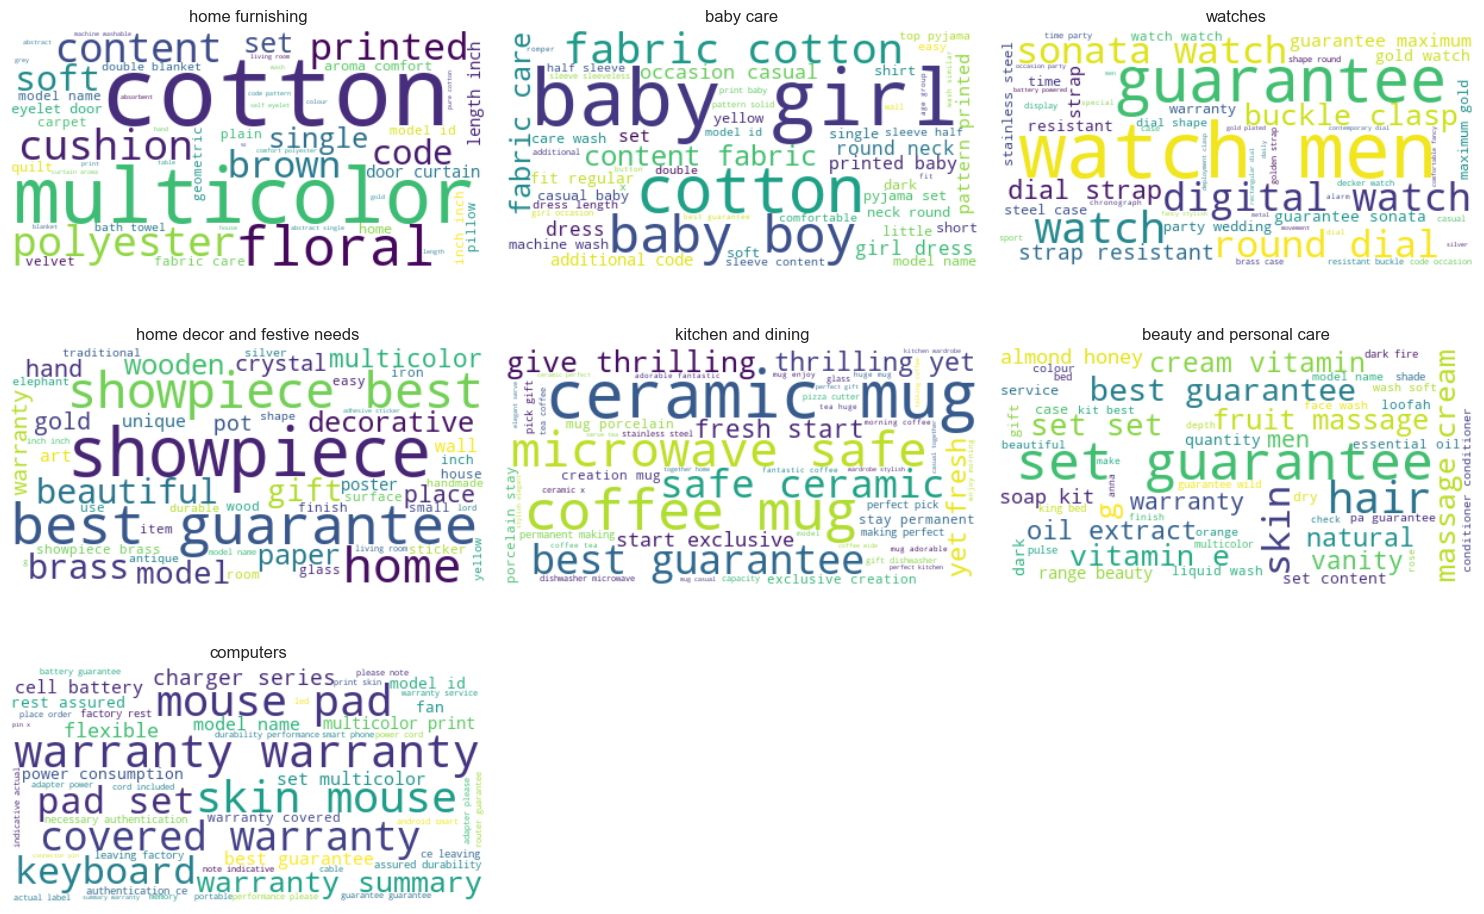

In [29]:
categories = ["home furnishing", "baby care", "watches", "home decor and festive needs", "kitchen and dining", "beauty and personal care", "computers"]

# Représentation graphique
num_categories = len(categories)
num_rows = 3  
num_cols = 3  
if num_categories < num_rows * num_cols:
    num_rows = (num_categories + num_cols - 1) // num_cols
    
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Création du corpus et du wordcloud pour chaque catégorie
for i, category in enumerate(categories): 
    corpus = " ".join(df_wordcloud[df_wordcloud['main_category'].str.contains(category)].final_description.values)
    wordcloud = WordCloud(background_color="white", max_words=50).generate(corpus)
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(category)
    ax.axis('off')

# Supprimer les sous-graphiques vides
for j in range(num_categories, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

On remarque que les mots les plus fréquents dans chaque catégorie sont représentatifs de leur contenu respectif. Cela appuie l'idée que le processus de pré-nettoyage a produit des nuages de mots bien représentatif.
Toutefois, certaines ambiguïtés sont apparentes, comme la présence de mots communs à plusieurs catégories, tel que le mot 'cotton' retrouvé à la fois dans la catégorie 'home furnishing' et 'baby care, ou encore 'guarantee''. Cela suggère qu'il pourrait être nécessaire d'approfondir la phase de nettoyage. Cependant, étant donné que nous sommes actuellement dans une phase de test de faisabilité plutôt que dans une recherche de classification parfaite, nous nous en tiendrons à ces résultats.

In [30]:
# Sauvegarde du fichier avec text processing
df.to_csv("clean_description.csv", index=False)

# III- Etude de faisabilité

# 3.1) Le bag of words (BoW)

Le "Bag of Words" (BoW) est une technique utilisée pour représenter du texte sous forme de vecteurs numériques. L'idée principale derrière le BoW est de représenter un document en comptant la fréquence d'occurrence de chaque mot dans ce document, puis en les organisant dans un vecteur.s. applications.

## _3.1.1) CountVectorizer_

CountVectorizer transforme chaque document en un vecteur de nombres entiers qui représentent le nombre d'occurrences de chaque mot dans le document.

In [31]:
count_vectorizer = CountVectorizer(stop_words="english")
term_frequency = count_vectorizer.fit_transform(df["final_description"])

# Création d'un dataframe
bow_df = pd.DataFrame(term_frequency.toarray(), columns=count_vectorizer.get_feature_names_out())
bow_df.head()

aa  ability  able  abode  abroad  absorbency  absorbent  absorbing  \
0   0        0     0      0       0           0          0          0   
1   0        0     0      0       0           0          0          0   
2   0        0     0      0       0           1          0          0   
3   0        0     0      0       0           0          0          0   
4   0        0     0      0       0           0          0          0   

   abstract  accent  ...  year  yellow  york  young  youth  youthful  zero  \
0         4       0  ...     0       0     0      0      0         0     0   
1         0       0  ...     0       2     0      0      0         0     0   
2         0       0  ...     0       0     0      0      0         0     0   
3         0       0  ...     0       0     0      0      0         0     0   
4         0       0  ...     0       0     0      0      0         0     0   

   zinc  zipper  zone  
0     0       0     0  
1     0       0     0  
2     0       0     0  
3     0       0     0  
4     0       0     0  

[5 rows x 2071 columns]

## _3.1.2) Réduction en 2 dimensions_

Une réduction en 2 dimensions est demandé dans le cadre de ce projet, afin de projeter les produits sur un graphique 2D, sous la forme de points dont la couleur correspondra à la catégorie réelle. Nous allons donc dans un premier temps effectué cette réduction avec une PCA, mais aussi dans un second temps avec un TSNE

### La PCA

La PCA est généralement utilisée pour réduire la dimensionnalité des données en projetant les données dans un nouvel espace de dimension inférieure, tout en préservant au mieux la variance des données d'origine. Cela permet de réduire le bruit et la redondance dans les données tout en préservant les informations importantes.

In [32]:
print(bow_df.shape)
pca = PCA(n_components=0.99)
feat_pca = pca.fit_transform(bow_df)
print(feat_pca.shape)

(1050, 2071)
(1050, 445)


### Le t-SNE

En utilisant t-SNE après la PCA, cela permet une réduction de composante en 2 dimensions tout en préservant les structures complexes des données.s.

In [33]:
# Réduction de dimension supplémentaire avec t-SNE
start_time_tsne = time.time()

#tsne = TSNE(n_components=2, perplexity=10, n_iter=2000, init='random', random_state=42)
#tsne = TSNE(n_components=2, perplexity=25, n_iter=2000, init='random', random_state=42)
tsne = TSNE(n_components=2, perplexity=35, n_iter=2000, init='random', random_state=42)

X_tsne = tsne.fit_transform(feat_pca)
end_time_tsne = time.time() - start_time_tsne
print("Temps de t-SNE :", "%.2f" % end_time_tsne, "secondes")

Temps de t-SNE : 7.81 secondes


### Kmeans

In [34]:
# K-Means
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_tsne)

# Stocker les résultats du t-SNE et du clustering
df_tsne_kmeans = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne_kmeans["class"] = df["main_category"]
df_tsne_kmeans["cluster"] = cluster_labels

# Calcul de l'ARI
ari = adjusted_rand_score(df_tsne_kmeans['class'], df_tsne_kmeans['cluster'])
print(f'ARI avec Bag of Words : {ari}')

D:\Programme\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ARI avec Bag of Words : 0.43050193247447727


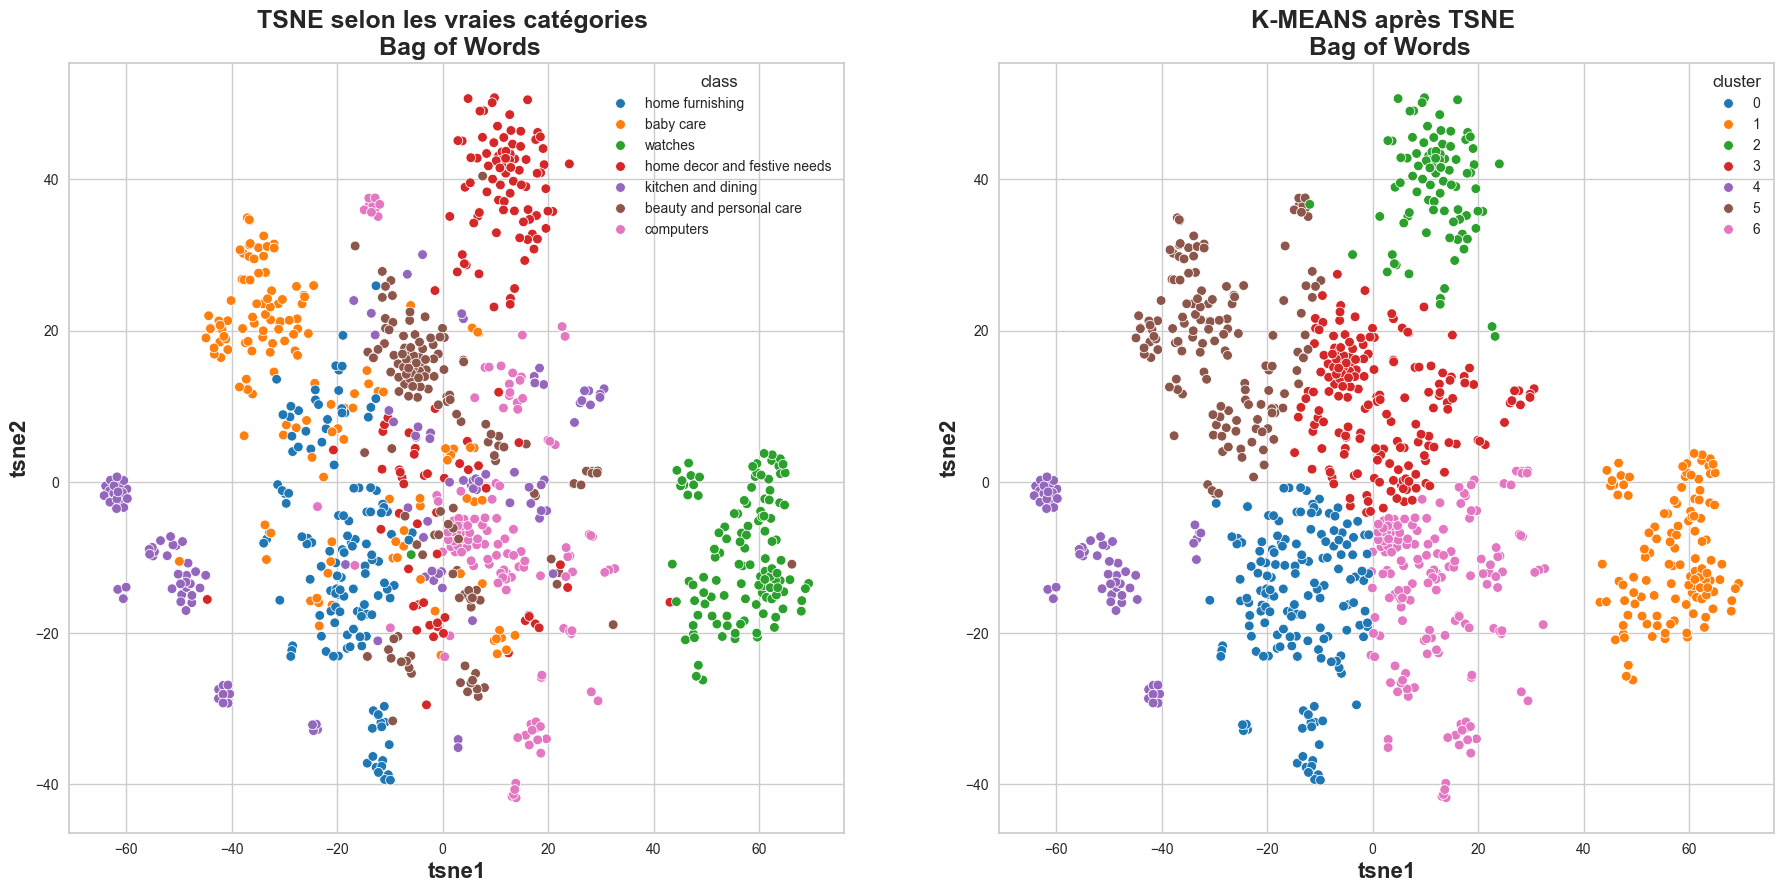

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="tab10"):
    plt.rcParams.update({"font.size": 12})
    sns.scatterplot(ax=axes[0], data=df_tsne_kmeans, x="tsne1", y="tsne2", hue="class", legend="brief")
    axes[0].set_xlabel("tsne1", fontsize=16, fontweight="bold")
    axes[0].set_ylabel("tsne2", fontsize=16, fontweight="bold")
    axes[0].set_title("TSNE selon les vraies catégories \n Bag of Words", fontsize=18, fontweight="bold")
    sns.scatterplot(ax=axes[1], data=df_tsne_kmeans, x="tsne1", y="tsne2", hue="cluster", palette="tab10", legend="brief")
    axes[1].set_xlabel("tsne1", fontsize=16, fontweight="bold")
    axes[1].set_ylabel("tsne2", fontsize=16, fontweight="bold")
    axes[1].set_title("K-MEANS après TSNE \n Bag of Words", fontsize=18, fontweight="bold")
plt.show()

L'utilisation de la technique BoW permet déjà d'obtenir un résultat assez satisfaisant. En effet, 2 catégories sont assez bien identifiées, à savoir 'watches' et 'home decor and festive needs'.
Nous allons donc essayer d'aller plus loin dans l'étude de la faisabilité avec l'utilisation  de TF-IDF

## 3.2) TF-IDF

Le TF-IDF (Term Frequency-Inverse Document Frequency) est une mesure statistique utilisée pour évaluer l'importance d'un terme dans un document par rapport à un ensemble de documents. Les termes avec des scores TF-IDF élevés sont considérés comme importants pour un document particulier, mais peu fréquents dans l'ensemble des documents, ce qui les rend potentiellement plus discriminants pour des tâches telles que la recherche d'information ou la classification de texte.

**Term Frequency (TF)**

Cela mesure le nombre de fois qu'un terme apparaît dans un document divisé par le nombre total de termes dans ce document. L'idée est que plus un terme apparaît fréquemment dans un document, plus il est important pour ce document.

TF(d, t) = (Nombre de fois où le terme t apparaît dans le document d) / (Nombre total de termes dans le document d)

**Inverse Document Frequency (IDF)**

Cela mesure l'importance d'un terme dans l'ensemble des documents. Les termes qui apparaissent fréquemment dans de nombreux documents sont moins discriminants que ceux qui n'apparaissent que dans quelques documents. L'IDF diminue le poids des termes qui apparaissent dans de nombreux documents.

IDF(t) = log(Nombre total de documents / Nombre de documents contenant le terme t)

**TF-IDF Score**

Le score TF-IDF d'un terme dans un document est simplement le produit de son TF et de son IDF.

TF-IDF(d, t) = TF(d, t) * IDF(t)

In [36]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
term_frequency = tfidf_vectorizer.fit_transform(df["final_description"])
tfidf_df = pd.DataFrame(term_frequency.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

aa  ability  able  abode  abroad  absorbency  absorbent  absorbing  \
0  0.0      0.0   0.0    0.0     0.0     0.00000        0.0        0.0   
1  0.0      0.0   0.0    0.0     0.0     0.00000        0.0        0.0   
2  0.0      0.0   0.0    0.0     0.0     0.08303        0.0        0.0   
3  0.0      0.0   0.0    0.0     0.0     0.00000        0.0        0.0   
4  0.0      0.0   0.0    0.0     0.0     0.00000        0.0        0.0   

   abstract  accent  ...  year    yellow  york  young  youth  youthful  zero  \
0  0.197624     0.0  ...   0.0  0.000000   0.0    0.0    0.0       0.0   0.0   
1  0.000000     0.0  ...   0.0  0.211912   0.0    0.0    0.0       0.0   0.0   
2  0.000000     0.0  ...   0.0  0.000000   0.0    0.0    0.0       0.0   0.0   
3  0.000000     0.0  ...   0.0  0.000000   0.0    0.0    0.0       0.0   0.0   
4  0.000000     0.0  ...   0.0  0.000000   0.0    0.0    0.0       0.0   0.0   

   zinc  zipper  zone  
0   0.0     0.0   0.0  
1   0.0     0.0   0.0  
2   0.0     0.0   0.0  
3   0.0     0.0   0.0  
4   0.0     0.0   0.0  

[5 rows x 2071 columns]

In [37]:
#PCA
print(tfidf_df.shape)
feat_pca_tfidf = pca.fit_transform(tfidf_df)

# TSNE
start_time_tsne = time.time()
tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=42)
tfidf_tsne = tsne.fit_transform(feat_pca_tfidf)
end_time_tsne = time.time() - start_time_tsne
print("Temps de t-SNE :", "%.2f" % end_time_tsne, "secondes")

(1050, 2071)
Temps de t-SNE : 5.47 secondes


In [38]:
# K-Means
cluster_labels_tfidf = kmeans.fit_predict(tfidf_tsne)

# Stocker les résultats du t-SNE et du clustering
tfidf_tsne_kmeans = pd.DataFrame(tfidf_tsne, columns=['tsne1', 'tsne2'])
tfidf_tsne_kmeans["class"] = df["main_category"]
tfidf_tsne_kmeans["cluster"] = cluster_labels

# Calcul de l'ARI
ari_tfidf = adjusted_rand_score(tfidf_tsne_kmeans['class'], tfidf_tsne_kmeans['cluster'])
print(f'ARI avec TF-IDF : {ari_tfidf}')

ARI avec TF-IDF : 0.43050193247447727


D:\Programme\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


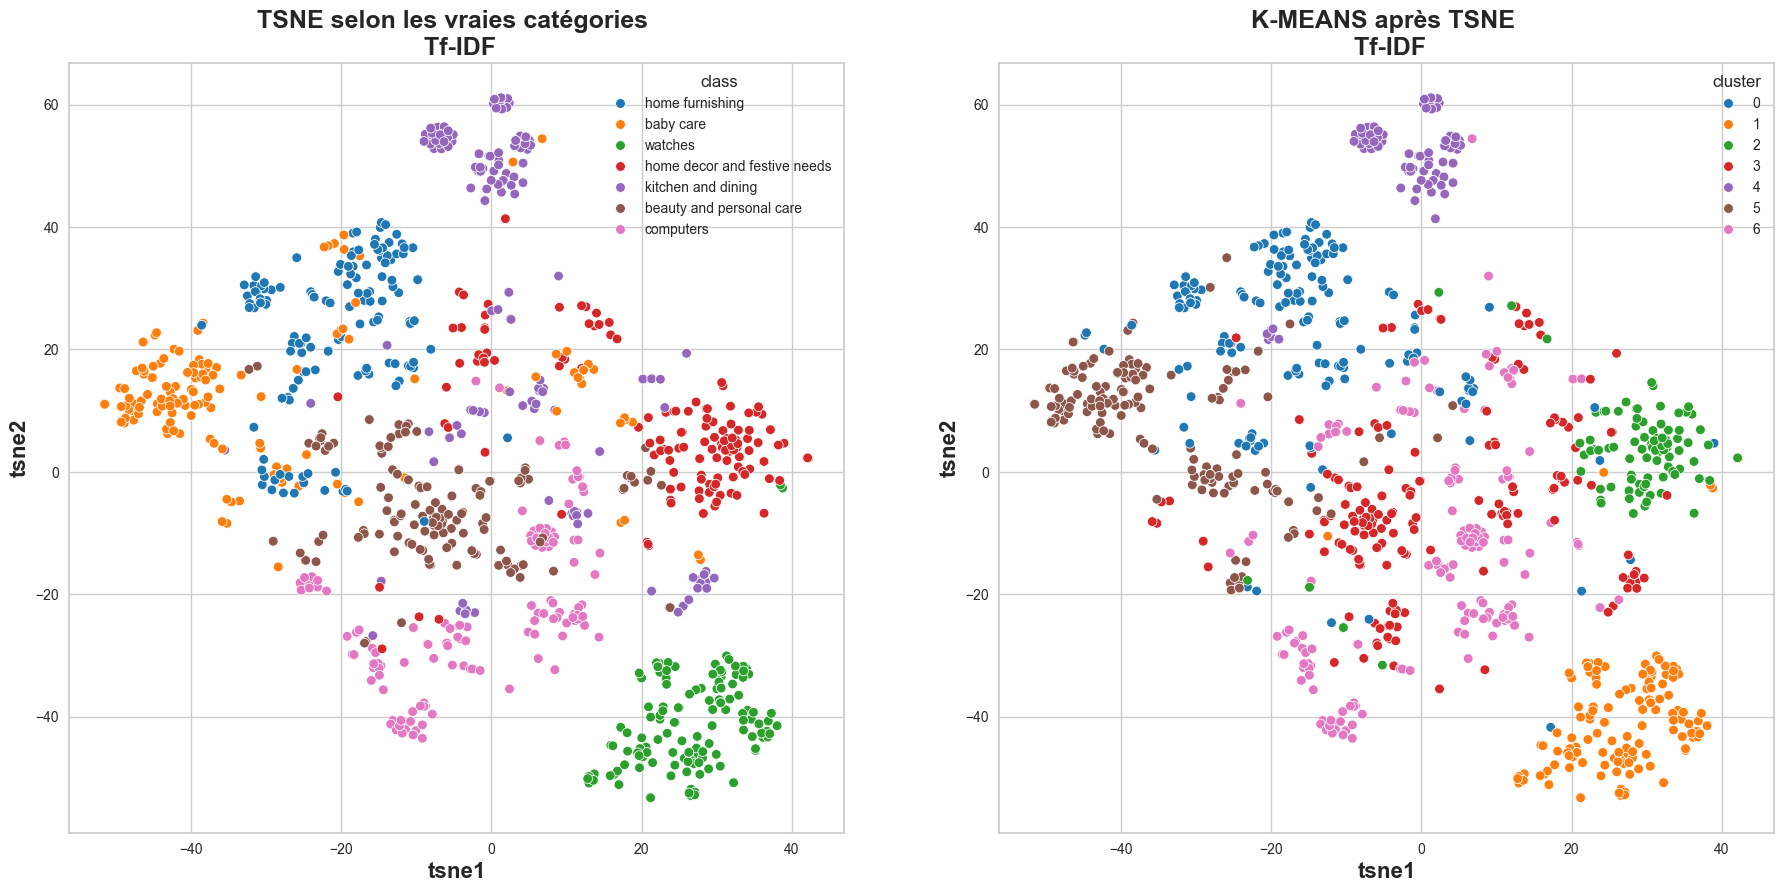

In [39]:
# Visualisation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="tab10"):
    plt.rcParams.update({"font.size": 12})
    sns.scatterplot(ax=axes[0], data=tfidf_tsne_kmeans, x="tsne1", y="tsne2", hue="class", legend="brief")
    axes[0].set_xlabel("tsne1", fontsize=16, fontweight="bold")
    axes[0].set_ylabel("tsne2", fontsize=16, fontweight="bold")
    axes[0].set_title("TSNE selon les vraies catégories \n Tf-IDF", fontsize=18, fontweight="bold")
    sns.scatterplot(ax=axes[1], data=tfidf_tsne_kmeans, x="tsne1", y="tsne2", hue="cluster", palette="tab10", legend="brief")
    axes[1].set_xlabel("tsne1", fontsize=16, fontweight="bold")
    axes[1].set_ylabel("tsne2", fontsize=16, fontweight="bold")
    axes[1].set_title("K-MEANS après TSNE \n Tf-IDF", fontsize=18, fontweight="bold")
plt.show()

La mesure du score ARI est identique mais visuellement, nous pouvons remarquer que la pondération conduit à une meilleure classification des produits.

## 3.3) Word2Vec

Word2Vec est une technique de représentation de mots dans un espace vectoriel continu. Elle vise à capturer les similarités sémantiques et syntaxiques entre les mots en les représentant comme des vecteurs de nombres réels dans un espace multidimensionnel. Cette méthode se base sur un réseau de neurones artificiels pour apprendre des représentations vectorielles des mots à partir d'un grand corpus de texte non annoté.

In [40]:
# Longeur max de chaine de caractères
max_length = df["final_description"].str.len().max()
print(max_length)

# Nombre max de mots pour une chaîne de caractères
max_words = df["final_description"].str.split(" ").str.len().max()
print(max_words)

1433
210


In [41]:
w2v_size = 128
w2v_window = 5
w2v_min_count = 1
w2v_epochs = 100
maxlen = 206

# Préparation des sentences (tokenization)
sentences = df["final_description"].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [42]:
# Création et entraînement du modèle Word2Vec
print("Création et entrainement du modèle Word2Vec")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                   vector_size=w2v_size)

w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)

model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size:", len(w2v_words))
print("Word2Vec trained")  

Création et entrainement du modèle Word2Vec
Vocabulary size: 2158
Word2Vec trained


In [43]:
# Préparation des données pour le modèle d'embedding
print("Instantiation du tokenizer")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences), maxlen=maxlen, padding='post')
num_words = len(tokenizer.word_index) + 1
print("Nombre de mots uniques:", num_words)

Instantiation du tokenizer
Nombre de mots uniques: 2159


In [44]:
# Création de la matrice d'embedding
print("Création de la matrice de plongement")
embedding_matrix = np.zeros((num_words, w2v_size))

for word, idx in tokenizer.word_index.items():
    if word in w2v_words:
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

word_rate = np.sum(embedding_matrix.sum(axis=1) != 0) / num_words
print("Word embedding rate : ", word_rate)

Création de la matrice de plongement
Word embedding rate :  0.999536822603057


In [45]:
# Création du modèle
word_input = Input(shape=(maxlen,), dtype='float64')  
word_embedding = Embedding(input_dim=num_words,
                           output_dim=w2v_size,
                           trainable=False,
                           embeddings_initializer=Constant(embedding_matrix))(word_input)
word_vec = GlobalAveragePooling1D()(word_embedding)  
embed_model = Model(inputs=word_input, outputs=word_vec)
embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 206)]             0         
                                                                 
 embedding (Embedding)       (None, 206, 128)          276352    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 276,352
Trainable params: 0
Non-trainable params: 276,352
_________________________________________________________________


In [46]:
# Entraînement du modèle d'embedding
embeddings = embed_model.predict(x_sentences)
print("Shape of embeddings:", embeddings.shape)

33/33 [==============================] - 0s 3ms/step
Shape of embeddings: (1050, 128)


In [47]:
# T-SNE
start_w2v = time.time()
tsne_w2v = TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=42)
X_tsne_w2v = tsne_w2v.fit_transform(embeddings)
stop_w2v = time.time() - start_w2v
print("Temps de T-SNE:", "%.2f" % stop_w2v, "secondes")

# Création du dataframe pour visualisation
df_tsne_w2v = pd.DataFrame(X_tsne_w2v, columns=['tsne1', 'tsne2'])
df_tsne_w2v["class"] = df["main_category"] 


Temps de T-SNE: 7.55 secondes


In [48]:
# Réalisation du k-means avec 7 clusters (7 catégories de produits)
kmeans_w2v = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans_w2v.fit_predict(X_tsne_w2v)

# Récupération des clusters
kmeans_w2v_labels = kmeans_w2v.labels_

# Ajout des clusters au dataframe précédent
df_tsne_w2v["cluster"] = kmeans_w2v_labels

print(df_tsne_w2v.head())
print()
ari_w2v = adjusted_rand_score(df_tsne_w2v['class'],df_tsne_w2v['cluster'])
print(f'ARI après modélisation avec le modèle Word2Vec : {ari_w2v}')

       tsne1      tsne2            class  cluster
0  -9.066052  38.391502  home furnishing        2
1 -19.752995  21.228325        baby care        2
2 -19.405624  22.143032        baby care        2
3 -20.648884  39.387848  home furnishing        2
4 -20.749392  40.180874  home furnishing        2

ARI après modélisation avec le modèle Word2Vec : 0.5061389542283863


D:\Programme\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


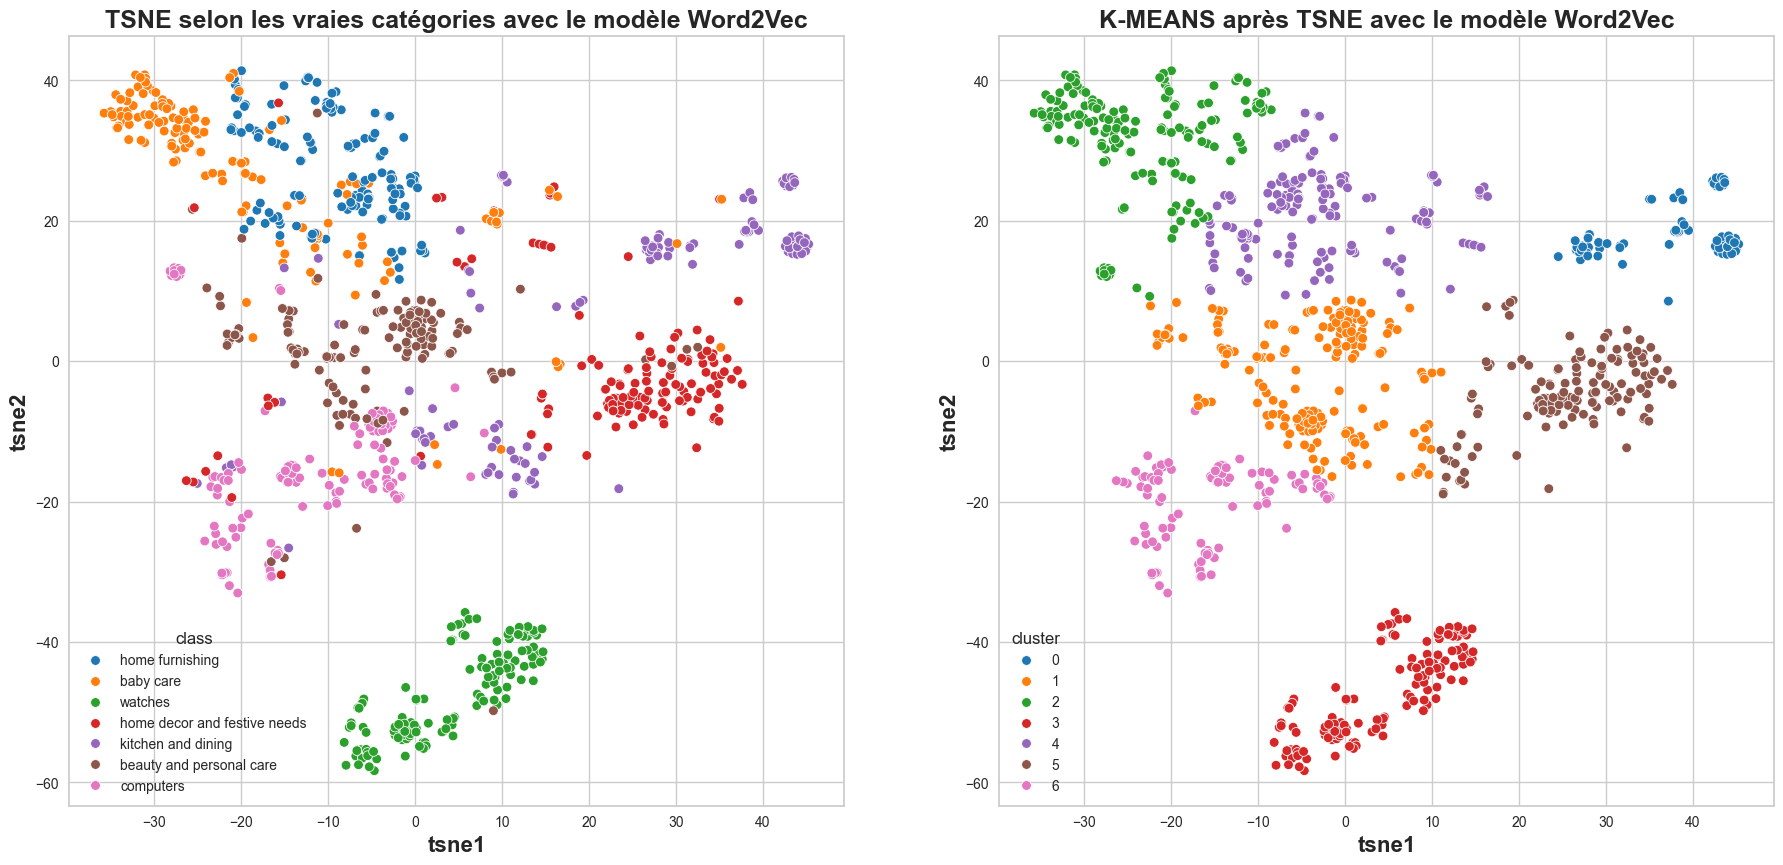

In [49]:
# Visualisation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="tab10"):
    plt.rcParams.update({"font.size": 12})
    sns.scatterplot(ax=axes[0], data=df_tsne_w2v, x="tsne1", y="tsne2", hue="class", legend="brief")
    axes[0].set_xlabel("tsne1", fontname="sans-serif", fontsize=16, fontweight="bold")
    axes[0].set_ylabel("tsne2", fontname="sans-serif", fontsize=16, fontweight="bold")
    axes[0].set_title("TSNE selon les vraies catégories avec le modèle Word2Vec", fontname="sans-serif", fontsize=18, fontweight="bold")
    sns.scatterplot(ax=axes[1], data=df_tsne_w2v, x="tsne1", y="tsne2", hue="cluster", palette="tab10", legend="brief")
    axes[1].set_xlabel("tsne1", fontname="sans-serif", fontsize=16, fontweight="bold")
    axes[1].set_ylabel("tsne2", fontname="sans-serif", fontsize=16, fontweight="bold")
    axes[1].set_title("K-MEANS après TSNE avec le modèle Word2Vec", fontname="sans-serif", fontsize=18, fontweight="bold")
plt.show()

Le score ARI est meilleur que pour le BoW et la classification est plutôt satisfaisante

## 3.4) BERT

BERT est un modèle de langage pré-entraîné développé par Google en 2018. Il s'agit d'un modèle basé sur les transformers, une architecture de réseau de neurones particulièrement efficace pour le traitement de séquences, comme le langage naturel.

Ce qui distingue BERT des modèles précédents, c'est sa capacité à prendre en compte le contexte bidirectionnel lors de l'entraînement. Contrairement aux modèles de langage précédents qui ne considéraient que le contexte précédent ou suivant lors de la prédiction d'un mot, BERT prend en compte le contexte à la fois avant et après un mot donné dans une phrase.

BERT est pré-entraîné sur de vastes corpus de texte non annoté à l'aide de deux tâches principales : la prédiction de mots masqués et la prédiction de la relation entre paires de phrasutres.

## 3.4.1) BERT HuggingFace

In [50]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df["pre_clean_description"].to_list()

# Création des features avec BERT
features_bert, last_hidden_states_tot = fc.feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='HF')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

1/1 [==============================] - 1s 958ms/step
temps traitement :  119.0


In [51]:
# T-SNE
start_bert_hf = time.time()
tsne_bert_hf = TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=42)
X_tsne_bert_hf = tsne_bert_hf.fit_transform(features_bert)
stop_bert_hf = time.time() - start_bert_hf
print("Temps de T-SNE : ", "%15.2f" % stop_bert_hf, "secondes")

# Création du dataframe pour visualisation
df_tsne_bert_hf = pd.DataFrame(X_tsne_bert_hf, columns=['tsne1', 'tsne2'])
df_tsne_bert_hf["class"] = df["main_category"]

Temps de T-SNE :             7.33 secondes


In [52]:
# Réalisation du clustering avec K-Means
kmeans_bert_hf = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans_bert_hf.fit_predict(X_tsne_bert_hf)

# Ajout des clusters au dataframe
df_tsne_bert_hf["cluster"] = kmeans_bert_hf.labels_

print(df_tsne_bert_hf.head())
print()

# Calcul de l'ARI
ari_bert_hf = adjusted_rand_score(df_tsne_bert_hf['class'], df_tsne_bert_hf['cluster'])
print(f'ARI après modélisation avec BERT HuggingFace : {ari_bert_hf}')

       tsne1      tsne2            class  cluster
0 -10.820712 -24.767498  home furnishing        6
1 -11.674155 -38.390446        baby care        6
2 -11.368497 -39.289032        baby care        6
3 -21.028515 -28.405054  home furnishing        6
4 -20.284620 -29.846741  home furnishing        6

ARI après modélisation avec BERT HuggingFace : 0.3706230759106479


D:\Programme\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


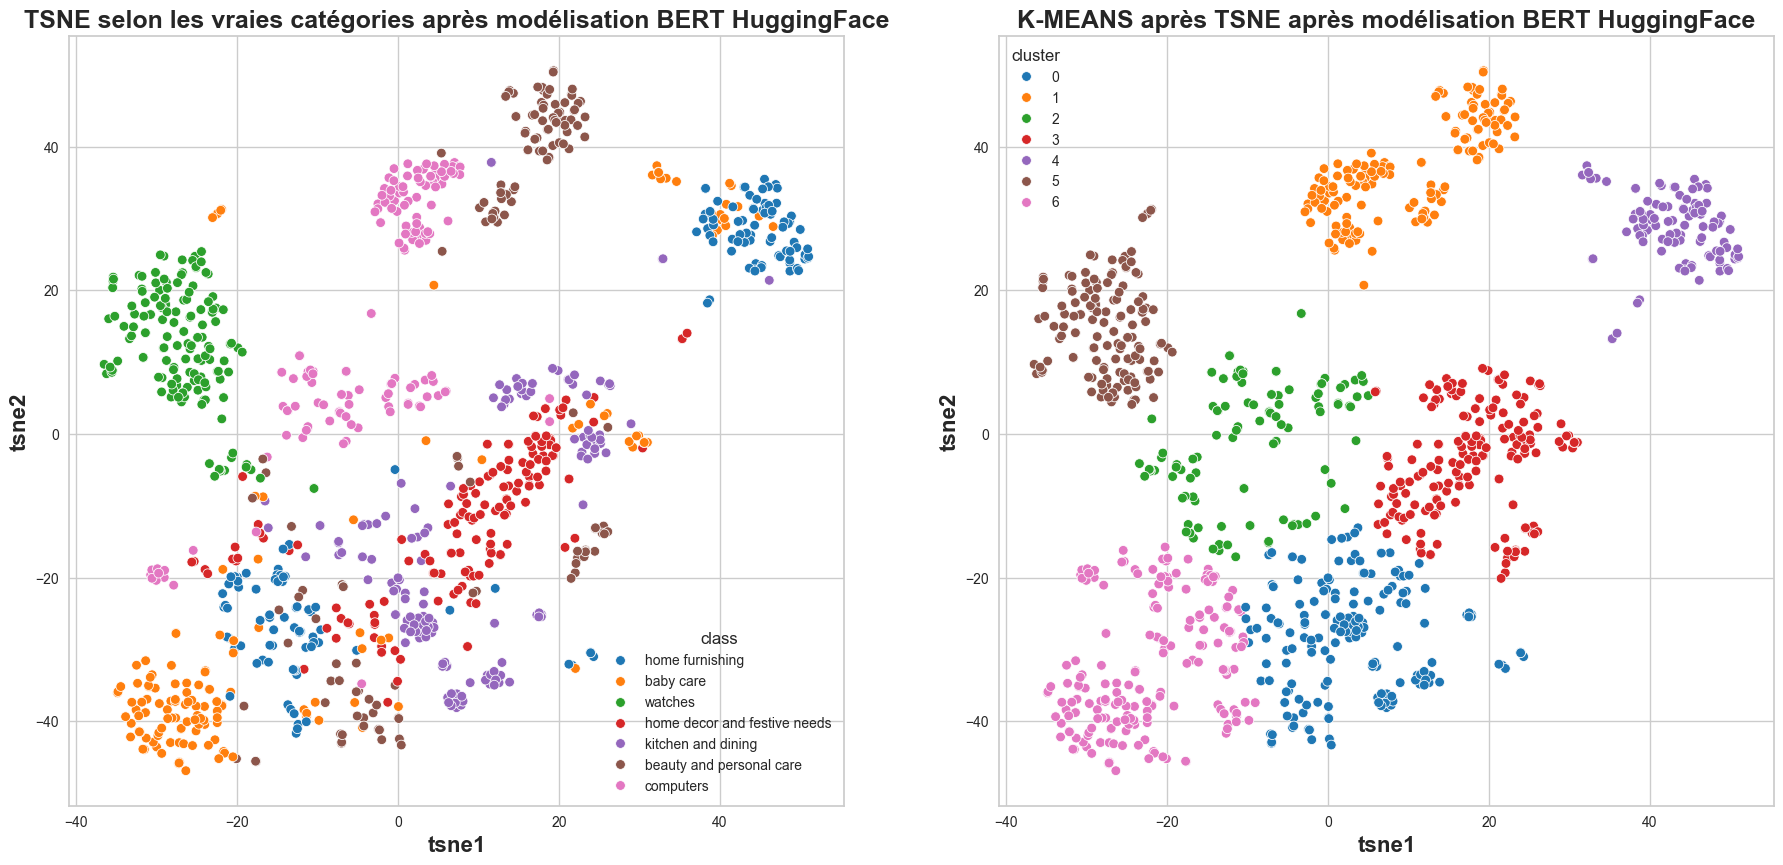

In [53]:
# Visualisation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="tab10"):
    plt.rcParams.update({"font.size": 12})
    sns.scatterplot(ax=axes[0], data=df_tsne_bert_hf, x="tsne1", y="tsne2", hue="class", legend="brief")
    axes[0].set_xlabel("tsne1", fontname="sans-serif", fontsize=16, fontweight="bold")
    axes[0].set_ylabel("tsne2", fontname="sans-serif", fontsize=16, fontweight="bold")
    axes[0].set_title("TSNE selon les vraies catégories après modélisation BERT HuggingFace", fontname="sans-serif", fontsize=18, fontweight="bold")
    sns.scatterplot(ax=axes[1], data=df_tsne_bert_hf, x="tsne1", y="tsne2", hue="cluster", palette="tab10", legend="brief")
    axes[1].set_xlabel("tsne1", fontname="sans-serif", fontsize=16, fontweight="bold")
    axes[1].set_ylabel("tsne2", fontname="sans-serif", fontsize=16, fontweight="bold")
    axes[1].set_title("K-MEANS après TSNE après modélisation BERT HuggingFace", fontname="sans-serif", fontsize=18, fontweight="bold")
plt.show()

Le résultat est clairement moins bons que le Word2Vec que ce soit au niveau visuel ou au niveau du score ARI.

## 3.4.1) BERT Hub Tensorflow

In [54]:
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [55]:
sentences = df["pre_clean_description"].to_list()

In [56]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = fc.feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  116.0


In [57]:
# T-SNE
start_bert_hub = time.time()

tsne_bert_hub = TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=42)
X_tsne_bert_hub = tsne_bert_hub.fit_transform(features_bert)

stop_bert_hub = time.time() - start_bert_hub

print("Temps de T-SNE : ", "%15.2f" % stop_bert_hub, "secondes")

Temps de T-SNE :             7.50 secondes


In [58]:
# Création du dataframe
df_tsne_bert_hub = pd.DataFrame(X_tsne_bert_hub, columns=['tsne1', 'tsne2'])
df_tsne_bert_hub["class"] = df["main_category"]
df_tsne_bert_hub.head()

tsne1      tsne2            class
0 -19.604229 -18.202070  home furnishing
1 -32.309711 -22.708588        baby care
2 -33.253994 -22.653610        baby care
3 -20.272842 -28.056505  home furnishing
4 -21.894730 -27.875921  home furnishing

In [59]:
# Réalisation du k-means avec 7 clusters (7 catégories de produits)
kmeans_bert_hub = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans_bert_hub.fit(X_tsne_bert_hub)

# Récupération des clusters
kmeans_bert_hub_labels = kmeans_bert_hub.labels_

# Ajout des clusters au dataframe précédent
df_tsne_bert_hub["cluster"] = kmeans_bert_hub_labels

print(df_tsne_bert_hub.head())
print()
ari_bert_hub = adjusted_rand_score(df_tsne_bert_hub['class'],df_tsne_bert_hub['cluster'])
print(f'ARI après modélisation avec BERT Hub Tensorflow : {ari_bert_hub}')

       tsne1      tsne2            class  cluster
0 -19.604229 -18.202070  home furnishing        1
1 -32.309711 -22.708588        baby care        1
2 -33.253994 -22.653610        baby care        1
3 -20.272842 -28.056505  home furnishing        1
4 -21.894730 -27.875921  home furnishing        1

ARI après modélisation avec BERT Hub Tensorflow : 0.35595506452914205


D:\Programme\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


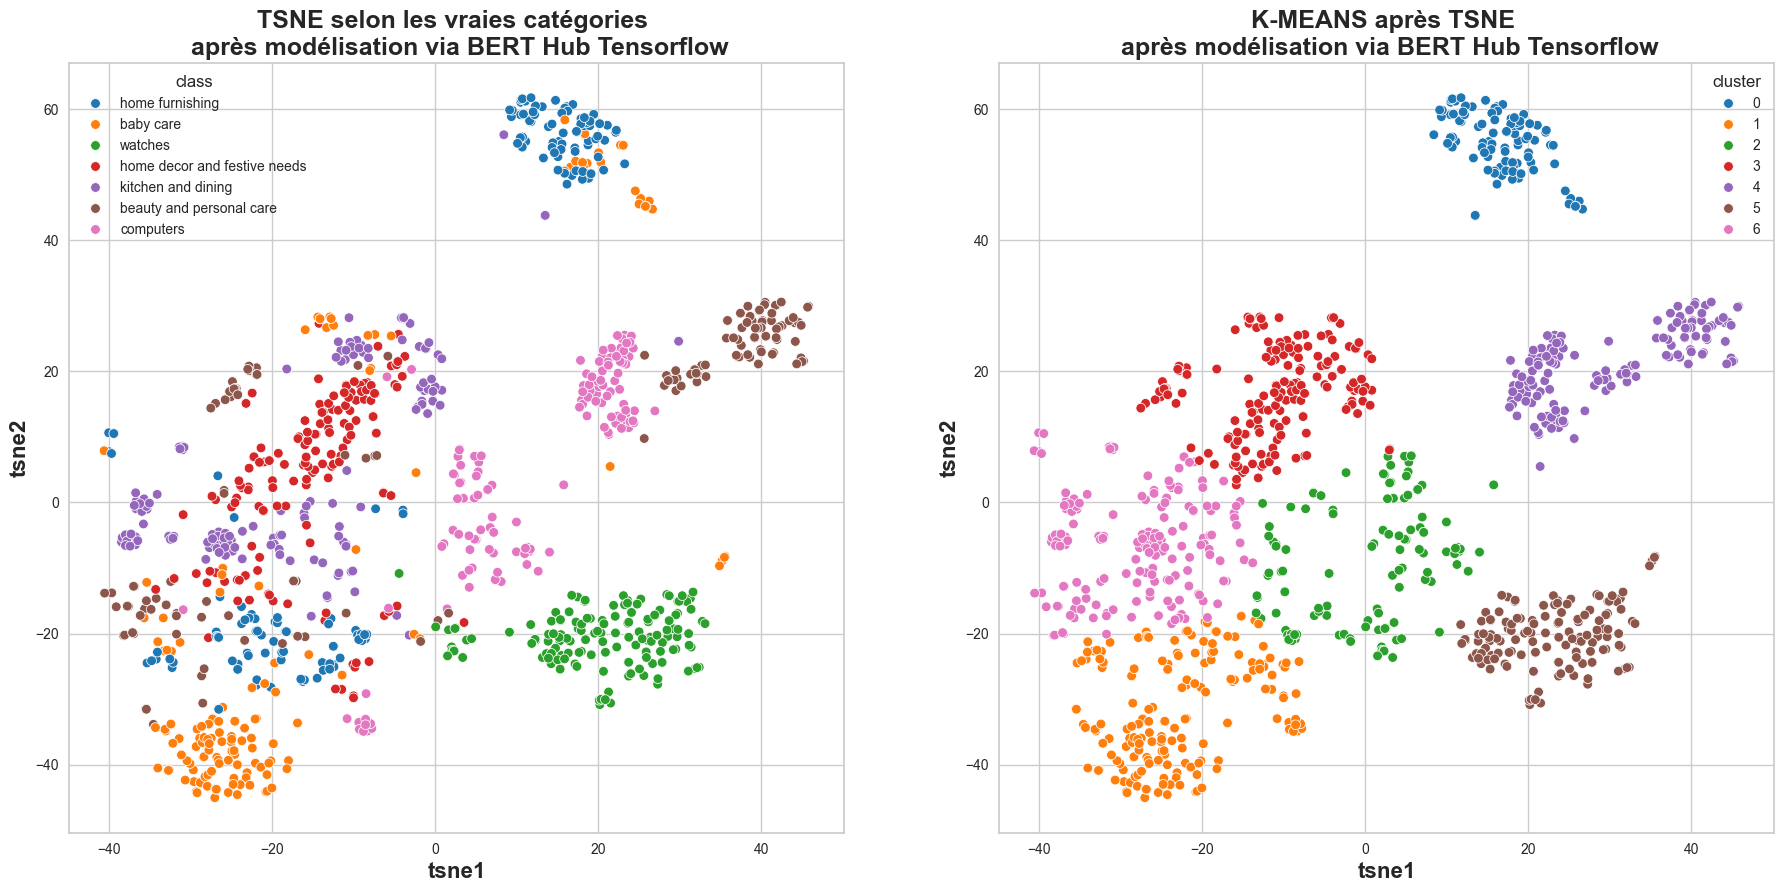

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="tab10"):
    plt.rcParams.update({"font.size":12})
    sns.scatterplot(ax=axes[0], data= df_tsne_bert_hub, x="tsne1", y="tsne2", hue="class", legend="brief")
    axes[0].set_xlabel("tsne1", fontname= "sans-serif", fontsize = 16, fontweight = "bold")
    axes[0].set_ylabel("tsne2", fontname= "sans-serif", fontsize = 16, fontweight = "bold")
    axes[0].set_title("TSNE selon les vraies catégories \n après modélisation via BERT Hub Tensorflow", fontname= "sans-serif", fontsize = 18, fontweight = "bold")
    sns.scatterplot(ax=axes[1], data= df_tsne_bert_hub, x="tsne1", y="tsne2", hue="cluster", palette="tab10", legend="brief")
    axes[1].set_xlabel("tsne1", fontname= "sans-serif", fontsize = 16, fontweight = "bold")
    axes[1].set_ylabel("tsne2", fontname= "sans-serif", fontsize = 16, fontweight = "bold")
    axes[1].set_title("K-MEANS après TSNE \n après modélisation via BERT Hub Tensorflow", fontname= "sans-serif", fontsize = 18, fontweight = "bold")
plt.show()

## 3.5) USE

USE est un modèle de traitement de langage naturel (NLP) développé par Google. Contrairement à BERT qui se concentre sur la représentation de mots, USE est spécifiquement conçu pour encoder des phrases et des paragraphes entiers.

Ce qui distingue USE, c'est sa capacité à générer des représentations vectorielles universelles pour des phrases de différentes langues et de différentes longueurs. Ces représentations sont apprises à partir de données non annotées et sont conçues pour capturer des informations sémantiques et syntaxiques importantes dans le text, etc.

In [61]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [62]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [63]:
batch_size = 8
sentences = df['pre_clean_description'].to_list()
features_USE = feature_USE_fct(sentences, batch_size)

In [64]:
# T-SNE
start_use = time.time()
tsne_use = TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=42)
X_tsne_use = tsne_use.fit_transform(features_USE)
stop_use = time.time() - start_use
print("Temps de T-SNE : ", "%15.2f" % stop_use, "secondes")

Temps de T-SNE :             6.61 secondes


In [65]:
# Création du dataframe
df_tsne_use = pd.DataFrame(X_tsne_use, columns=['tsne1', 'tsne2'])
df_tsne_use["class"] = df["main_category"]
df_tsne_use.head

<bound method NDFrame.head of           tsne1      tsne2            class
0     11.528088  15.637938  home furnishing
1     12.207572  20.688503        baby care
2     11.189657  20.667383        baby care
3      3.299893  18.149395  home furnishing
4      3.866921  16.856161  home furnishing
...         ...        ...              ...
1043  -7.278393 -29.856371        baby care
1044  -7.432376 -30.407547        baby care
1045   2.295166   9.022086        baby care
1046   2.905690   9.471786        baby care
1047  -8.404051 -29.893229        baby care

[1048 rows x 3 columns]>

In [66]:
# Réalisation du k-means avec 7 clusters (7 catégories de produits)
kmeans_tsne_use = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans_tsne_use.fit_predict(X_tsne_use)

# Récupération des clusters
kmeans_tsne_use_labels = kmeans_tsne_use.labels_

# Ajout des clusters au dataframe précédent
df_tsne_use["cluster"] = kmeans_tsne_use_labels

print(df_tsne_use.head())
print()
ari_use = adjusted_rand_score(df_tsne_use['class'],df_tsne_use['cluster'])
print(f'ARI après modélisation avec USE : {ari_use}')

       tsne1      tsne2            class  cluster
0  11.528088  15.637938  home furnishing        2
1  12.207572  20.688503        baby care        2
2  11.189657  20.667383        baby care        2
3   3.299893  18.149395  home furnishing        2
4   3.866921  16.856161  home furnishing        2

ARI après modélisation avec USE : 0.4654881397156288


D:\Programme\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


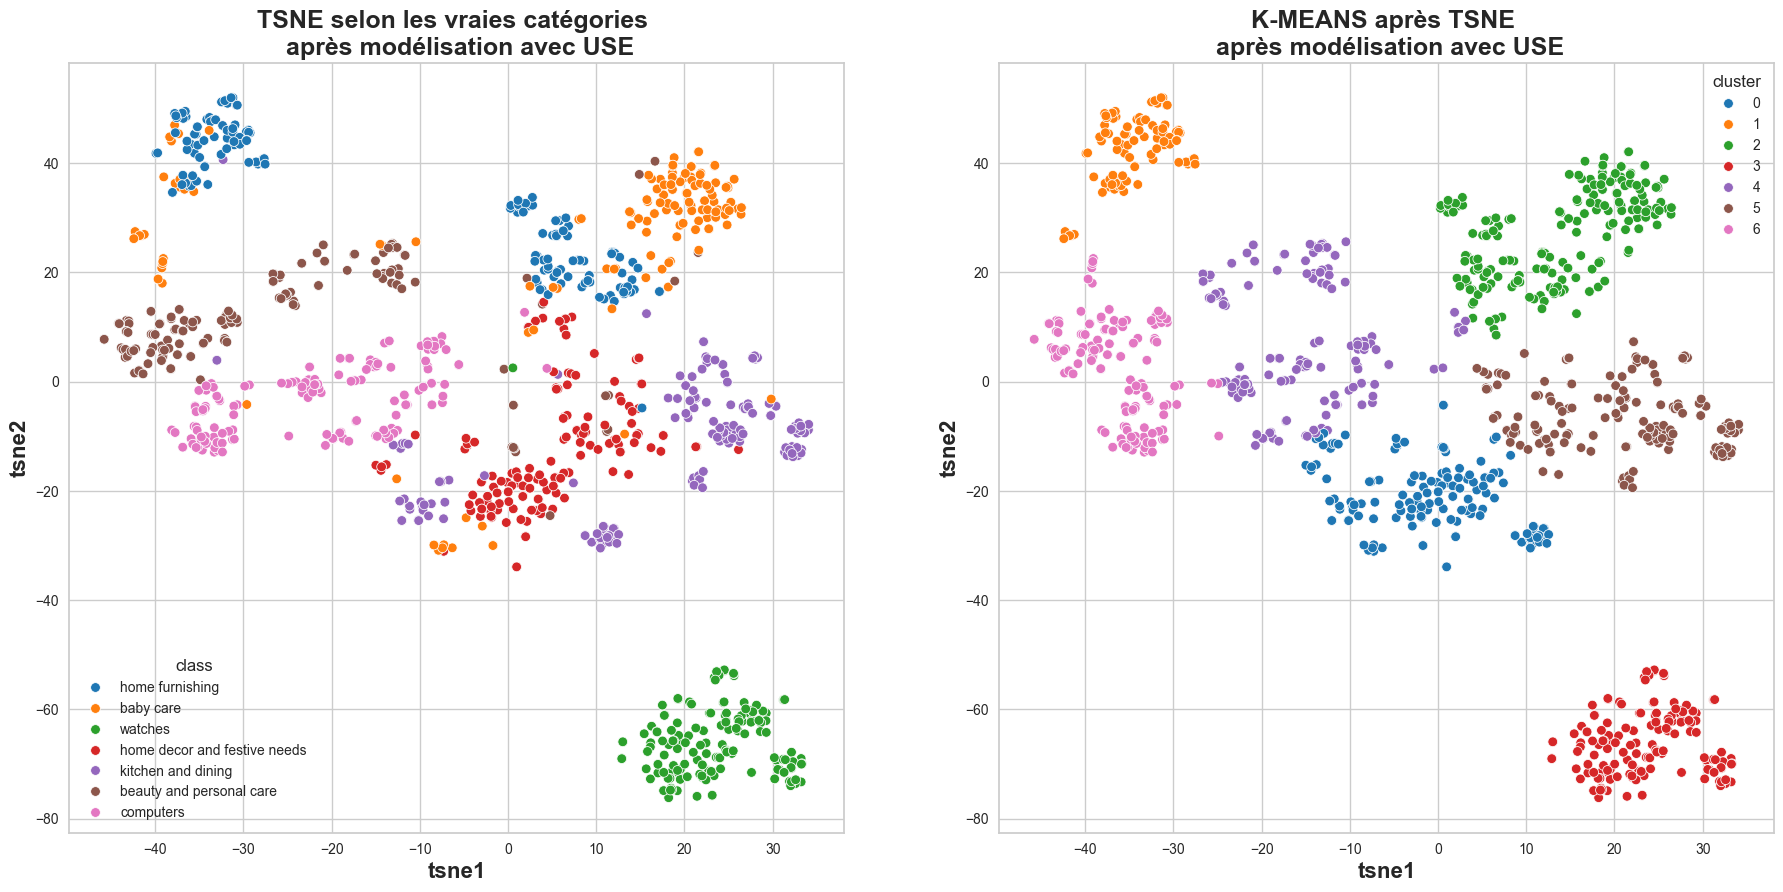

In [67]:
# Visualisation par nuages de points
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
with sns.color_palette(palette="tab10"):
    plt.rcParams.update({"font.size":12})
    sns.scatterplot(ax=axes[0], data= df_tsne_use, x="tsne1", y="tsne2", hue="class", legend="brief")
    axes[0].set_xlabel("tsne1", fontname= "sans-serif", fontsize = 16, fontweight = "bold")
    axes[0].set_ylabel("tsne2", fontname= "sans-serif", fontsize = 16, fontweight = "bold")
    axes[0].set_title("TSNE selon les vraies catégories \n après modélisation avec USE", fontname= "sans-serif", fontsize = 18, fontweight = "bold")
    sns.scatterplot(ax=axes[1], data= df_tsne_use, x="tsne1", y="tsne2", hue="cluster", palette="tab10", legend="brief")
    axes[1].set_xlabel("tsne1", fontname= "sans-serif", fontsize = 16, fontweight = "bold")
    axes[1].set_ylabel("tsne2", fontname= "sans-serif", fontsize = 16, fontweight = "bold")
    axes[1].set_title("K-MEANS après TSNE \n après modélisation avec USE", fontname= "sans-serif", fontsize = 18, fontweight = "bold")
plt.show()

Nous pouvons remarquer qu'au niveau du score ARI (0.46) cette approche donne de meilleurs résultats que BERT. Néanmoins, elle reste moins performante que le Word2Vect.

## Conclusion

Ce notebook a permis de montrer la faisabilité de la classification des produits selon leur catégorie. 

Une meilleure classification sera possible avec un travail plus poussé dans la conception d'une classification parfaite, ce qui n'était pas le cas dans ce notebook où seule la faisabilité était évalué.

Les catégories avec le plus de ressemblance sont celles qui posent le plus problème. 
Il serait interessant de mieux segmenter ces catégories en sous-catégories plus précises.